# Day-49: Time Series Forecasting Projet

## Step-1 ENV setup

In [70]:
import pandas as pd
import numpy as np

## Step-2 Dataset Loading

In [71]:
df = pd.read_csv('BKB_WaterQualityData_2020084.csv')
df.head()

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
0,Bay,NaN,1/3/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,11:00,NaN,NaN,NaN,8.0,1994
1,Bay,NaN,1/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,11:30,NaN,NaN,NaN,2.6,1994
2,Bay,NaN,2/7/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,9:45,NaN,NaN,NaN,7.6,1994
3,Bay,NaN,2/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,NaN,NaN,NaN,NaN,2.7,1994
4,Bay,NaN,2/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,10:30,NaN,NaN,NaN,0.0,1994


In [72]:
df.shape

(2371, 17)

## Step-3 EDA and Data Cleaning

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site_Id                  2370 non-null   object 
 1   Unit_Id                  32 non-null     object 
 2   Read_Date                2366 non-null   object 
 3   Salinity (ppt)           2241 non-null   float64
 4   Dissolved Oxygen (mg/L)  1520 non-null   float64
 5   pH (standard units)      2276 non-null   float64
 6   Secchi Depth (m)         2298 non-null   float64
 7   Water Depth (m)          2300 non-null   float64
 8   Water Temp (?C)          2250 non-null   float64
 9   Air Temp-Celsius         85 non-null     float64
 10  Air Temp (?F)            2300 non-null   float64
 11  Time (24:00)             2308 non-null   object 
 12  Field_Tech               2332 non-null   object 
 13  DateVerified             453 non-null    object 
 14  WhoVerified             

### Read_Date

In [74]:
# Convert 'Read_Date' to datetime, coerce errors to NaT
df['Read_Date'] = pd.to_datetime(df['Read_Date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Site_Id                  2370 non-null   object        
 1   Unit_Id                  32 non-null     object        
 2   Read_Date                2366 non-null   datetime64[ns]
 3   Salinity (ppt)           2241 non-null   float64       
 4   Dissolved Oxygen (mg/L)  1520 non-null   float64       
 5   pH (standard units)      2276 non-null   float64       
 6   Secchi Depth (m)         2298 non-null   float64       
 7   Water Depth (m)          2300 non-null   float64       
 8   Water Temp (?C)          2250 non-null   float64       
 9   Air Temp-Celsius         85 non-null     float64       
 10  Air Temp (?F)            2300 non-null   float64       
 11  Time (24:00)             2308 non-null   object        
 12  Field_Tech               2332 non-

<Axes: >

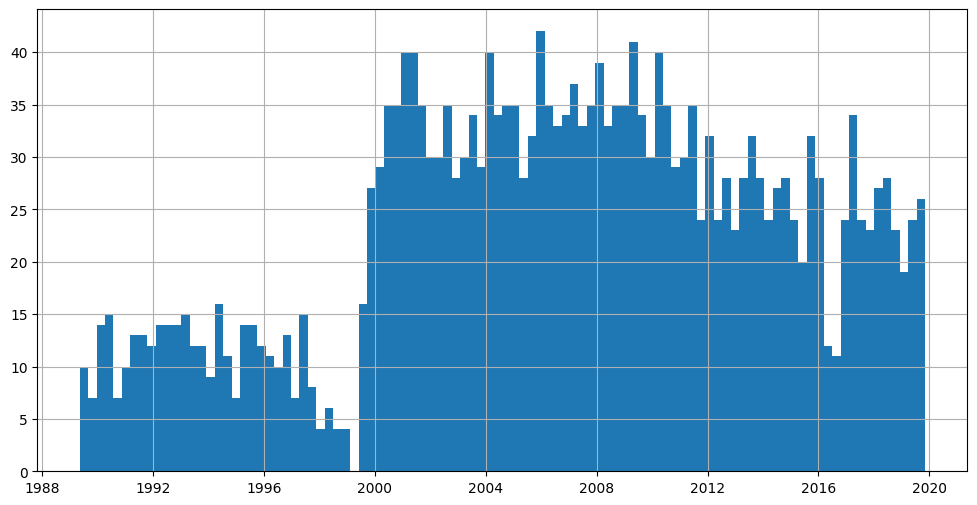

In [75]:
df['Read_Date'].hist(bins=100, figsize=(12, 6))

In [76]:
df["Read_year"] = df["Read_Date"].dt.year
df["Read_month"] = df["Read_Date"].dt.month
df["Read_day"] = df["Read_Date"].dt.day

In [77]:
df["Read_year"].value_counts()

Read_year
2009.0    120
2004.0    119
2006.0    118
2008.0    117
2001.0    115
2007.0    114
2000.0    109
2010.0    109
2002.0    108
2005.0    107
2003.0     98
2011.0     97
2013.0     91
2012.0     88
2015.0     88
2014.0     87
2017.0     85
2018.0     82
2019.0     65
2016.0     59
1992.0     45
1999.0     45
1991.0     43
1995.0     42
1993.0     42
1994.0     38
1990.0     37
1996.0     35
1997.0     31
1989.0     17
1998.0     15
Name: count, dtype: int64

In [78]:
df['Read_year'].isnull().sum()

np.int64(5)

In [79]:
read_date_null = df['Read_Date'].isna()

df[read_date_null].head()

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year,Read_year,Read_month,Read_day
2049,Bay,NaN,NaT,0.0,NaN,7.0,0.3,0.5,14.0,NaN,52.0,09:20,Susan Poe,NaN,NaN,11.111111,1899,NaN,NaN,NaN
2090,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.777778,1899,NaN,NaN,NaN
2101,D,NaN,NaT,0.0,3.9,6.5,0.3,1.8,22.0,NaN,70.0,10:00,Sue Poe,NaN,NaN,21.111111,1899,NaN,NaN,NaN
2212,A,NaN,NaT,1.0,NaN,7.0,0.6,1.0,17.0,NaN,70.0,4/4/18,Sue Poe,10/29/2019,Christine Folks,21.111111,1899,NaN,NaN,NaN
2257,D,NaN,NaT,0.0,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN,Sue Poe,10/30/2019,Christine Folks,-17.777778,1899,NaN,NaN,NaN


In [80]:
df["DateVerified"]  = pd.to_datetime(df["DateVerified"], errors="coerce")


In [81]:
df["Read_Date"] = df["Read_Date"].fillna(df["DateVerified"])

In [82]:
read_date_null = df['Read_Date'].isna()
df[read_date_null].head()

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year,Read_year,Read_month,Read_day
2049,Bay,NaN,NaT,0.0,NaN,7.0,0.3,0.5,14.0,NaN,52.0,09:20,Susan Poe,NaT,NaN,11.111111,1899,NaN,NaN,NaN
2090,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,-17.777778,1899,NaN,NaN,NaN
2101,D,NaN,NaT,0.0,3.9,6.5,0.3,1.8,22.0,NaN,70.0,10:00,Sue Poe,NaT,NaN,21.111111,1899,NaN,NaN,NaN


#### drop rows where Read_Date is still NaT

In [83]:
# drop rows where Read_Date is still NaT
df = df.dropna(subset=["Read_Date"])

In [84]:
df["Read_year"] = df["Read_Date"].dt.year
df["Read_month"] = df["Read_Date"].dt.month
df["Read_day"] = df["Read_Date"].dt.day

In [85]:
df.shape

(2368, 20)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2368 entries, 0 to 2370
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Site_Id                  2368 non-null   object        
 1   Unit_Id                  32 non-null     object        
 2   Read_Date                2368 non-null   datetime64[ns]
 3   Salinity (ppt)           2239 non-null   float64       
 4   Dissolved Oxygen (mg/L)  1519 non-null   float64       
 5   pH (standard units)      2274 non-null   float64       
 6   Secchi Depth (m)         2296 non-null   float64       
 7   Water Depth (m)          2298 non-null   float64       
 8   Water Temp (?C)          2248 non-null   float64       
 9   Air Temp-Celsius         85 non-null     float64       
 10  Air Temp (?F)            2298 non-null   float64       
 11  Time (24:00)             2306 non-null   object        
 12  Field_Tech               2330 non-null 

In [87]:
# count read_year is not equal to Year
mismatch_year = (df["Read_year"] != df["Year"])
print(f"count read_year is not equal to Year: {mismatch_year.sum()}")

count read_year is not equal to Year: 2


In [88]:
df[mismatch_year]

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year,Read_year,Read_month,Read_day
2212,A,NaN,2019-10-29,1.0,NaN,7.0,0.6,1.0,17.0,NaN,70.0,4/4/18,Sue Poe,2019-10-29,Christine Folks,21.111111,1899,2019,10,29
2257,D,NaN,2019-10-30,0.0,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN,Sue Poe,2019-10-30,Christine Folks,-17.777778,1899,2019,10,30


In [89]:
# check null values in Year
year_null = df["Year"].isnull()
print(f"count Year is null: {year_null.sum()}")

count Year is null: 0


In [90]:
df['Year'].value_counts()

Year
2009    120
2004    119
2006    118
2008    117
2001    115
2007    114
2000    109
2010    109
2002    108
2005    107
2003     98
2011     97
2013     91
2012     88
2015     88
2014     87
2017     85
2018     82
2019     65
2016     59
1992     45
1999     45
1991     43
1995     42
1993     42
1994     38
1990     37
1996     35
1997     31
1989     17
1998     15
1899      2
Name: count, dtype: int64

In [91]:
# drop column Year
df = df.drop(columns=["Year"])

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2368 entries, 0 to 2370
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Site_Id                  2368 non-null   object        
 1   Unit_Id                  32 non-null     object        
 2   Read_Date                2368 non-null   datetime64[ns]
 3   Salinity (ppt)           2239 non-null   float64       
 4   Dissolved Oxygen (mg/L)  1519 non-null   float64       
 5   pH (standard units)      2274 non-null   float64       
 6   Secchi Depth (m)         2296 non-null   float64       
 7   Water Depth (m)          2298 non-null   float64       
 8   Water Temp (?C)          2248 non-null   float64       
 9   Air Temp-Celsius         85 non-null     float64       
 10  Air Temp (?F)            2298 non-null   float64       
 11  Time (24:00)             2306 non-null   object        
 12  Field_Tech               2330 non-null 

### Time

In [93]:
df['Time (24:00)'].value_counts()

Time (24:00)
0:00       1440
14:24        52
19:12        47
4:48         46
9:36         44
           ... 
11:03         1
10:52         1
09:55         1
0938          1
5/23/19       1
Name: count, Length: 99, dtype: int64

In [98]:

str_time = df["Time (24:00)"].astype(str).str.strip()

# 1) Drop obvious dates (e.g., 5/23/19)
str_time = str_time.mask(str_time.str.contains(r"\d{1,2}/\d{1,2}/\d{2,4}", na=False))

# 2) Fix HHMM / HMM without colon: e.g., "0938" -> "09:38", "938" -> "09:38"
mask_hhmm = str_time.str.fullmatch(r"\d{3,4}", na=False)
str_time.loc[mask_hhmm] = (
    str_time.loc[mask_hhmm].str.zfill(4).str.replace(r"(\d{2})(\d{2})", r"\1:\2", regex=True)
)

# 3) Normalize one-digit minutes like "9:6" -> "9:06"
str_time = str_time.str.replace(r"^(\d{1,2}):(\d{1})$", r"\1:0\2", regex=True)

# 4) Parse as datetimes anchored to an arbitrary date
time = pd.to_datetime(str_time, format="%H:%M", errors="coerce")

# Save cleaned times to a new column
df["Time_clean"] = time.dt.strftime("%H:%M")

# 5) Mean time (straight mean; good if times don’t straddle midnight)
mean_ts = time.dropna().mean()
mean_time = mean_ts.strftime("%H:%M") if pd.notna(mean_ts) else None

print(f"mean time: {mean_time}")

# fill null values in Time (24:00) with mean_time
time_null = df["Time_clean"].isnull()
df.loc[time_null, "Time (24:00)"] = mean_time
time_not_null = df["Time_clean"].notnull()
print(f"count Time is not null: {time_not_null.sum()}")

df


mean time: 04:15
count Time is not null: 2368


,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Read_year,Read_month,Read_day,Time_clean
0,Bay,NaN,1994-01-03,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,11:00,NaN,NaT,NaN,8.000000,1994,1,3,11:00
1,Bay,NaN,1994-01-31,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,11:30,NaN,NaT,NaN,2.600000,1994,1,31,11:30
2,Bay,NaN,1994-02-07,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,9:45,NaN,NaT,NaN,7.600000,1994,2,7,09:45
3,Bay,NaN,1994-02-23,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,04:15,NaN,NaT,NaN,2.700000,1994,2,23,04:15
4,Bay,NaN,1994-02-28,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,10:30,NaN,NaT,NaN,0.000000,1994,2,28,10:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,Bay,NaN,2018-10-11,1.9,5.0,7.0,4.00,1.20,25.0,NaN,78.00,09:30,Sue Poe,2019-11-13,Christine Folks,25.555556,2018,10,11,09:30
2367,Bay,NaN,2018-10-24,0.0,9.0,7.0,0.30,0.60,18.0,NaN,58.00,09:30,Sue Poe,2019-11-13,Christine Folks,14.444444,2018,10,24,09:30
2368,Bay,NaN,2018-10-28,0.9,2.9,7.0,0.40,0.90,13.0,NaN,49.00,09:20,Sue Poe,2019-11-13,Christine Folks,9.444444,2018,10,28,09:20
2369,Bay,NaN,2018-11-07,1.7,NaN,7.0,0.45,0.90,20.0,NaN,65.00,09:45,Sue Poe,2019-11-13,Christine Folks,18.333333,2018,11,7,09:45


In [100]:
df.drop(columns=["Time (24:00)"], inplace=True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2368 entries, 0 to 2370
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Site_Id                  2368 non-null   object        
 1   Unit_Id                  32 non-null     object        
 2   Read_Date                2368 non-null   datetime64[ns]
 3   Salinity (ppt)           2239 non-null   float64       
 4   Dissolved Oxygen (mg/L)  1519 non-null   float64       
 5   pH (standard units)      2274 non-null   float64       
 6   Secchi Depth (m)         2296 non-null   float64       
 7   Water Depth (m)          2298 non-null   float64       
 8   Water Temp (?C)          2248 non-null   float64       
 9   Air Temp-Celsius         85 non-null     float64       
 10  Air Temp (?F)            2298 non-null   float64       
 11  Field_Tech               2330 non-null   object        
 12  DateVerified             453 non-null  

### DateVerified

In [103]:
df['DateVerified'] = pd.to_datetime(df['DateVerified'], errors='coerce')
print(f"count of missing in date verified:{df['DateVerified'].isna().sum()}")
df['DateVerified'].value_counts()

count of missing in date verified:1915


DateVerified
2019-10-30    60
2019-11-12    49
2017-04-11    40
2017-08-07    30
2016-01-04    26
2014-03-27    24
2019-11-05    21
2015-05-08    16
2017-10-17    15
2019-10-29    15
2017-11-17     8
2014-07-10     8
2016-02-29     8
2019-11-06     8
2015-02-10     8
2015-01-13     8
2019-10-31     8
2014-09-11     7
2016-03-28     6
2019-11-13     5
2014-04-14     4
2014-11-18     4
2014-10-14     4
2014-09-25     4
2014-07-24     4
2014-08-13     4
2014-05-16     4
2014-05-21     4
2016-05-06     4
2016-04-19     4
2014-10-21     4
2016-01-15     4
2015-06-03     4
2015-02-24     4
2015-06-12     4
2016-01-11     4
2019-11-01     4
2016-08-31     4
2014-12-04     3
2014-06-23     3
2016-03-22     2
2014-06-16     1
2014-12-02     1
2019-10-23     1
Name: count, dtype: int64

In [115]:
dateverified_not_null = df['DateVerified'].notna()

## difference between DateVerified and read_date in days
df['DateDiff'] = (df.loc[dateverified_not_null, 'DateVerified'] - df.loc[dateverified_not_null, 'Read_Date']).dt.days
df['DateDiff'].describe()

count     453.000000
mean      191.754967
std       310.033690
min         0.000000
25%        12.000000
50%        58.000000
75%       243.000000
max      1552.000000
Name: DateDiff, dtype: float64

<Axes: >

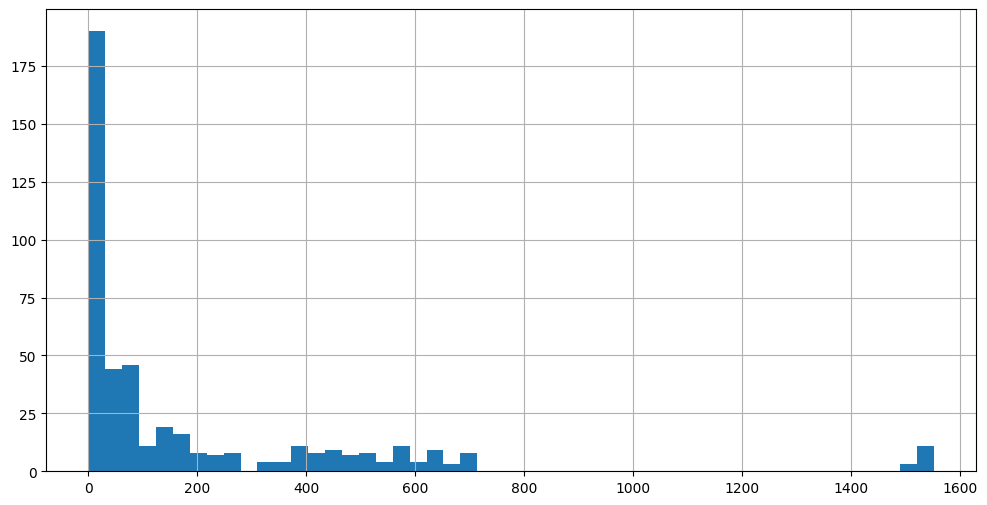

In [116]:
df['DateDiff'].hist(bins=50, figsize=(12, 6))

In [117]:
# to many outliers in DateDiff column and Date verified, so we will drop it and not use it for analysis
df.drop(columns=['DateDiff','DateVerified'], inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2368 entries, 0 to 2370
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Site_Id                  2368 non-null   object        
 1   Unit_Id                  32 non-null     object        
 2   Read_Date                2368 non-null   datetime64[ns]
 3   Salinity (ppt)           2239 non-null   float64       
 4   Dissolved Oxygen (mg/L)  1519 non-null   float64       
 5   pH (standard units)      2274 non-null   float64       
 6   Secchi Depth (m)         2296 non-null   float64       
 7   Water Depth (m)          2298 non-null   float64       
 8   Water Temp (?C)          2248 non-null   float64       
 9   Air Temp-Celsius         85 non-null     float64       
 10  Air Temp (?F)            2298 non-null   float64       
 11  Field_Tech               2330 non-null   object        
 12  WhoVerified              453 non-null  

### Site Id

In [120]:
df[df['Site_Id'].isnull()]

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Field_Tech,WhoVerified,AirTemp (C),Read_year,Read_month,Read_day,Time_clean


In [121]:
df['Site_Id'].value_counts()

Site_Id
Bay    793
D      439
B      437
A      434
C      264
d        1
Name: count, dtype: int64

In [122]:
df[df['Site_Id'] == 'd']

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Field_Tech,WhoVerified,AirTemp (C),Read_year,Read_month,Read_day,Time_clean
2027,d,01csv,2015-07-23,0.0,NaN,7.0,0.8,1.2,30.5,NaN,82.0,Sue Poe,NaN,27.777778,2015,7,23,10:55


#### Correcting Case error from Site_Id

In [123]:
df['Site_Id'] = df['Site_Id'].str.upper()

In [124]:
df['Site_Id'].value_counts()

Site_Id
BAY    793
D      440
B      437
A      434
C      264
Name: count, dtype: int64

### Droping invalid Site_Id entries

In [126]:
df.dropna(subset=['Site_Id'], inplace=True)

In [127]:
df.isnull().sum()

Site_Id                       0
Unit_Id                    2336
Read_Date                     0
Salinity (ppt)              129
Dissolved Oxygen (mg/L)     849
pH (standard units)          94
Secchi Depth (m)             72
Water Depth (m)              70
Water Temp (?C)             120
Air Temp-Celsius           2283
Air Temp (?F)                70
Field_Tech                   38
WhoVerified                1915
AirTemp (C)                   0
Read_year                     0
Read_month                    0
Read_day                      0
Time_clean                    0
dtype: int64

### Unit Id

In [128]:

df['Unit_Id'].value_counts()

Unit_Id
01csv    28
01CSV     4
Name: count, dtype: int64

unit_id consist of only 1 type of data points with typo error and also not for all data points which we can drop it.

In [131]:
df[df['Unit_Id'].isnull()]

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Field_Tech,WhoVerified,AirTemp (C),Read_year,Read_month,Read_day,Time_clean
0,BAY,NaN,1994-01-03,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,NaN,NaN,8.000000,1994,1,3,11:00
1,BAY,NaN,1994-01-31,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,NaN,NaN,2.600000,1994,1,31,11:30
2,BAY,NaN,1994-02-07,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,NaN,NaN,7.600000,1994,2,7,09:45
3,BAY,NaN,1994-02-23,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,NaN,NaN,2.700000,1994,2,23,04:15
4,BAY,NaN,1994-02-28,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,NaN,NaN,0.000000,1994,2,28,10:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,BAY,NaN,2018-10-11,1.9,5.0,7.0,4.00,1.20,25.0,NaN,78.00,Sue Poe,Christine Folks,25.555556,2018,10,11,09:30
2367,BAY,NaN,2018-10-24,0.0,9.0,7.0,0.30,0.60,18.0,NaN,58.00,Sue Poe,Christine Folks,14.444444,2018,10,24,09:30
2368,BAY,NaN,2018-10-28,0.9,2.9,7.0,0.40,0.90,13.0,NaN,49.00,Sue Poe,Christine Folks,9.444444,2018,10,28,09:20
2369,BAY,NaN,2018-11-07,1.7,NaN,7.0,0.45,0.90,20.0,NaN,65.00,Sue Poe,Christine Folks,18.333333,2018,11,7,09:45


#### WhoVerified

In [132]:
df['WhoVerified'].value_counts()

WhoVerified
Christine Folks       171
Kayla Braasch          62
Carly Sibilia          53
Rebecca Walawender     51
Erin Bailey            40
Karen Beatty           28
Amy Keiler             23
Karen Callaway         12
K Beatty                5
Trenton Miller          4
K. Beatty               3
amy keiler              1
Name: count, dtype: int64

we can drop WhoVerified column as its are not useful for our analysis

### Field_Tech

In [138]:
df['Field_Tech'].value_counts()

KeyError: 'Field_Tech'

we can drop Field_Tech column as its are not useful for our analysis

In [ ]:
# remove columns which are not required for analysis
df.drop(columns=['Unit_Id','WhoVerified','Field_Tech'], inplace=True)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2368 entries, 0 to 2370
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Site_Id                  2368 non-null   object        
 1   Read_Date                2368 non-null   datetime64[ns]
 2   Salinity (ppt)           2239 non-null   float64       
 3   Dissolved Oxygen (mg/L)  1519 non-null   float64       
 4   pH (standard units)      2274 non-null   float64       
 5   Secchi Depth (m)         2296 non-null   float64       
 6   Water Depth (m)          2298 non-null   float64       
 7   Water Temp (?C)          2248 non-null   float64       
 8   Air Temp-Celsius         85 non-null     float64       
 9   Air Temp (?F)            2298 non-null   float64       
 10  AirTemp (C)              2368 non-null   float64       
 11  Read_year                2368 non-null   int32         
 12  Read_month               2368 non-null 

### Salinity (ppt)

In [142]:
df[df['Salinity (ppt)'].isna()].shape

(129, 15)

In [143]:
salinity = pd.to_numeric(df['Salinity (ppt)'], errors='coerce')
salinity.describe()

count    2239.000000
mean        0.717709
std         1.231182
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         9.000000
Name: Salinity (ppt), dtype: float64

<Axes: >

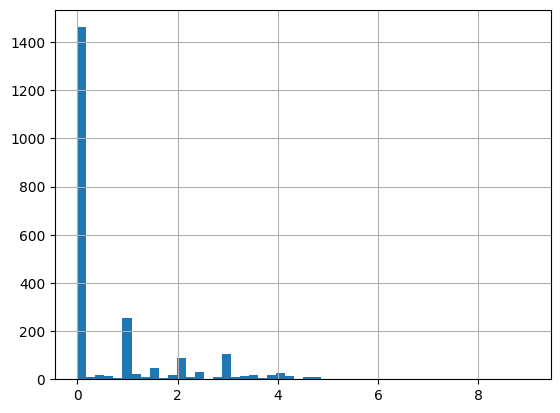

In [144]:
salinity.hist(bins=50)

In [150]:

miss_rate = salinity.isna().mean()
by_site = df.groupby('Site_Id')['Salinity (ppt)'].apply(lambda x: x.isna().mean()).sort_values(ascending=False)
print("Overall missing rate:", round(100*miss_rate,2), "%")
print(by_site.head(10))

Overall missing rate: 5.45 %
Site_Id
BAY    0.065574
C      0.064394
A      0.046083
B      0.045767
D      0.045455
Name: Salinity (ppt), dtype: float64


In [ ]:
# replace missinf values with mean salinity based on site and month
df["Salinity_clean_ppt"] = df.groupby(["Site_Id", "Read_month"])["Salinity (ppt)"].transform(
    lambda x: x.fillna(x.mean())
)


In [152]:
df.describe()

,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),AirTemp (C),Read_year,Read_month,Read_day,salinity_clean
count,2368,2239.000000,1519.000000,2274.000000,2296.000000,2298.000000,2248.000000,85.000000,2298.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000
mean,2006-10-13 16:14:47.837837824,0.717709,6.648071,7.168580,0.525094,0.762221,18.062193,16.437647,62.052552,15.676793,2006.286318,6.545186,14.153294,0.724246
min,1989-05-11 00:00:00,0.000000,0.000000,0.300000,0.000000,0.010000,0.000000,0.000000,10.500000,-17.777778,1989.000000,1.000000,1.000000,0.000000
25%,2001-10-02 00:00:00,0.000000,4.800000,6.500000,0.300000,0.400000,11.000000,9.000000,49.000000,8.888889,2001.000000,4.000000,7.000000,0.000000
50%,2007-03-01 00:00:00,0.000000,6.500000,7.000000,0.400000,0.650000,19.000000,15.000000,63.000000,16.666667,2007.000000,7.000000,14.000000,0.000000
75%,2012-08-09 00:00:00,1.000000,8.500000,7.500000,0.650000,0.950000,25.000000,21.700000,75.000000,23.888889,2012.000000,9.250000,21.000000,1.000000
max,2019-11-05 00:00:00,9.000000,15.100000,9.900000,9.000000,12.000000,74.000000,74.000000,92.300000,33.500000,2019.000000,12.000000,31.000000,9.000000
std,NaN,1.231182,2.506441,0.788699,0.473823,0.621009,8.301080,11.754138,15.496673,10.297299,7.551426,3.390833,8.453890,1.205892


In [153]:
# drop salinity column
df.drop(columns=['Salinity (ppt)'], inplace=True)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2368 entries, 0 to 2370
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Site_Id                  2368 non-null   object        
 1   Read_Date                2368 non-null   datetime64[ns]
 2   Dissolved Oxygen (mg/L)  1519 non-null   float64       
 3   pH (standard units)      2274 non-null   float64       
 4   Secchi Depth (m)         2296 non-null   float64       
 5   Water Depth (m)          2298 non-null   float64       
 6   Water Temp (?C)          2248 non-null   float64       
 7   Air Temp-Celsius         85 non-null     float64       
 8   Air Temp (?F)            2298 non-null   float64       
 9   AirTemp (C)              2368 non-null   float64       
 10  Read_year                2368 non-null   int32         
 11  Read_month               2368 non-null   int32         
 12  Read_day                 2368 non-null 

#### Air Temprature

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

tmp = df.copy()
tmp['Read_Date'] = pd.to_datetime(tmp['Read_Date'], errors='coerce')
tmp = tmp.sort_values('Read_Date')

s = pd.to_numeric(tmp['AirTemp (C)'], errors='coerce')

plt.figure()
plt.plot(tmp['Read_Date'], s, marker='o', linestyle='-')
plt.title('AirTemp (C) over time')
plt.xlabel('Read_Date')
plt.ylabel('AirTemp (C)')
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
import numpy as np
import pandas as pd

# Parse both columns as numbers
air_temp_cel = pd.to_numeric(df['Air Temp-Celsius'], errors='coerce')   # supposed Celsius, but may contain °F
air_temp_c = pd.to_numeric(df['AirTemp (C)'], errors='coerce')        # Celsius
air_temp_f = pd.to_numeric(df['Air Temp (?F)'], errors='coerce')        # Fahrenheit

# Helper: treat rows where both are present
both = air_temp_cel.notna() & air_temp_c.notna()

# 1) Rows where the two columns disagree (as-entered)
mismatch = both & ~np.isclose(air_temp_cel, air_temp_c, atol=0.5)

mismatch_count = mismatch.sum()
print(f"Number of rows where both columns are present but disagree: {mismatch_count}")

df[mismatch][['Air Temp-Celsius','Air Temp (?F)', 'AirTemp (C)']].head()


In [ ]:
df[mismatch][['Air Temp-Celsius','Air Temp (?F)','Water Temp (?C)', 'AirTemp (C)']]

In [ ]:
negative_temp = df['AirTemp (C)'] <= 0

negative_temp_count = negative_temp.sum()
print(f"Number of rows where 'AirTemp (C)' is less than or equal to 0: {negative_temp_count}")

df[negative_temp][['Air Temp-Celsius','Air Temp (?F)','Water Temp (?C)', 'AirTemp (C)']]

In [ ]:
df[negative_temp & both]

#### comparing air_temp in c and air_temp in f

In [ ]:
convert_f_to_c = (air_temp_f - 32.0) * (5.0/9.0)

# Helper: treat rows where both are present
both = convert_f_to_c.notna() & air_temp_c.notna()

mismatch_convert_temp = both & ~np.isclose(convert_f_to_c, air_temp_c, rtol=0, atol=0.5)

mismatch_convert_temp_count = mismatch_convert_temp.sum()
match_count = (both & ~mismatch_convert_temp).sum()

print(f"Rows with both F and C present: {both.sum()}")
print(f"Matches (F→C ≈ AirTemp (C)): {match_count}")
print(f"Mismatches: {mismatch_convert_temp_count}")

In [ ]:
# Define buckets (°C) and labels
bins    = [-np.inf, -10, 5, 25, 35, np.inf]   # [-inf,-10), [-10,5), [5,25), [25,35), [35,inf)
labels  = ['extreme cold', 'cold', 'normal', 'hot', 'extreme hot']

# Categorize (right=False means left-inclusive, right-exclusive)
cats = pd.cut(air_temp_c, bins=bins, labels=labels, right=False)

# Overall counts (ordered)
counts = cats.value_counts().reindex(labels, fill_value=0)
print(counts)

In [ ]:
# just extreme cold
extreme_cold_temp = df.loc[cats == 'extreme cold']

# extreme cold AND 'Air Temp-Celsius' is not null
extreme_cold_temp = df.loc[(cats == 'extreme cold') & (air_temp_cel.notna())]
extreme_cold_temp[['Air Temp-Celsius','Air Temp (?F)','Water Temp (?C)', 'AirTemp (C)']]

In [ ]:
# just extreme cold
extreme_cold_temp = df.loc[cats == 'extreme cold']

# extreme cold AND 'Air Temp-Celsius' is not null
extreme_cold_temp_f = df.loc[(cats == 'extreme cold') & (air_temp_f.notna())]
extreme_cold_temp_f[['Air Temp-Celsius','Air Temp (?F)','Water Temp (?C)', 'AirTemp (C)']]

In [ ]:
# just extreme cold
extreme_cold_temp = df.loc[cats == 'extreme cold']

# extreme cold AND 'Air Temp-Celsius' is not null
extreme_cold_temp_na = df.loc[(cats == 'extreme cold') & (air_temp_f.isna())]
print(extreme_cold_temp_na.count().sum())
avg_extreme_cold_temp_na = pd.to_numeric(extreme_cold_temp_na['AirTemp (C)'], errors='coerce')
print(avg_extreme_cold_temp_na.mean())

extreme_cold_temp_na[['Air Temp-Celsius','Air Temp (?F)','Water Temp (?C)', 'AirTemp (C)']]

In [ ]:
df.drop(columns=['Unit_Id','Air Temp-Celsius','Air Temp (?F)','WhoVerified','Field_Tech'], inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df[df['Read_Date'].isnull()]

In [ ]:
df['Read_Date'].dropna(inplace=True)

In [ ]:
df.dropna(subset=['Read_Date'], inplace=True)

In [ ]:
df.isnull().sum()